<a href="https://colab.research.google.com/github/eggheadsv/try_git/blob/master/%D0%92%D0%B2%D0%B5%D0%B4%D0%B5%D0%BD%D0%B8%D0%B5_%D0%B2_pandas_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Введение в pandas

**Цели обучения:**
   * Получите представление о структурах данных DataFrame и Series библиотеки *pandas*
   * Доступ и управление данными в DataFrame и Series
   * Импортировать данные CSV в *pandas* `DataFrame`
   * Переиндексируйте DataFrame для перемешивания данных

[*pandas*](http://pandas.pydata.org/) - это API-интерфейс (программный интерфейс приложения, интерфейс прикладного программирования) для анализа данных, ориентированный на столбцы. Это отличный инструмент для обработки и анализа входных данных, и многие фреймворки машинного обучения поддерживают структуры данных *pandas* в качестве входных данных.
Хотя полное введение в API *pandas* займет много страниц, основные концепции довольно просты, и мы представим их ниже. Для более полной справки посетите сайт [*pandas* docs site](http://pandas.pydata.org/pandas-docs/stable/index.html), содержащий обширную документацию и множество руководств.

## Основные понятия

Следующая строка импортирует API *pandas* и выводит версию API:

In [ ]:
from __future__ import print_function

import pandas as pd
pd.__version__

'1.1.5'

Основные структуры данных в *pandas* реализованы как два класса:

   * **`DataFrame`**, который вы можете представить как реляционную таблицу данных со строками и именованными столбцами.
   * **`Series`**, который представляет собой один столбец. DataFrame содержит одну или несколько серий и имя для каждой серии.

Фрейм данных - это обычно используемая абстракция для манипулирования данными. Подобные реализации существуют в [Spark](https://spark.apache.org/) и [R](https://www.r-project.org/about.html).

Один из способов создать `Series` - это создать объект `Series`. Например:

In [ ]:
pd.Series(['San Francisco', 'San Jose', 'Sacramento'])

0    San Francisco
1         San Jose
2       Sacramento
dtype: object

Объекты DataFrame могут быть созданы путем передачи имён столбцов `dict`, отображающих имена столбцов` string`, в соответствующие им `Series`. Если `Series` не совпадает по длине, отсутствующие значения заполняются специальными значениями [NA/NaN](http://pandas.pydata.org/pandas-docs/stable/missing_data.html). Пример:

In [ ]:
city_names = pd.Series(['San Francisco', 'San Jose', 'Sacramento'])
population = pd.Series([852469, 1015785, 485199])

pd.DataFrame({ 'City name': city_names, 'Population': population })

,City name,Population
0,San Francisco,852469
1,San Jose,1015785
2,Sacramento,485199


Но в большинстве случаев вы загружаете весь файл в `DataFrame`. В следующем примере загружается файл с данными о жилье в Калифорнии. Запустите следующую ячейку, чтобы загрузить данные и создать определения функций:

In [ ]:
california_housing_dataframe = pd.read_csv("https://download.mlcc.google.com/mledu-datasets/california_housing_train.csv", sep=",")
california_housing_dataframe.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,-119.562108,35.625225,28.589353,2643.664412,539.410824,1429.573941,501.221941,3.883578,207300.912353
std,2.005166,2.137340,12.586937,2179.947071,421.499452,1147.852959,384.520841,1.908157,115983.764387
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.790000,33.930000,18.000000,1462.000000,297.000000,790.000000,282.000000,2.566375,119400.000000
50%,-118.490000,34.250000,29.000000,2127.000000,434.000000,1167.000000,409.000000,3.544600,180400.000000
75%,-118.000000,37.720000,37.000000,3151.250000,648.250000,1721.000000,605.250000,4.767000,265000.000000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


В приведенном выше примере используется `DataFrame.describe`, чтобы показать интересную статистику о` DataFrame`. Еще одна полезная функция - `DataFrame.head`, которая отображает первые несколько записей` DataFrame`:

In [ ]:
california_housing_dataframe.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


Еще одна мощная функция *pandas* - это построение графиков. Например, `DataFrame.hist` позволяет быстро изучить распределение значений в столбце:

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd32f25dd90>]],
      dtype=object)

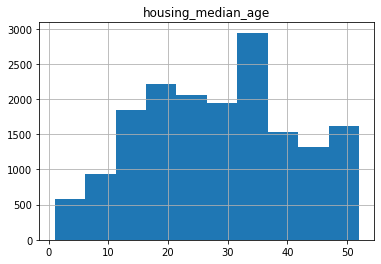

In [ ]:
california_housing_dataframe.hist('housing_median_age')

## Доступ к данным

Вы можете получить доступ к данным DataFrame, используя знакомые операции Python dict/list:

In [ ]:
cities = pd.DataFrame({ 'City name': city_names, 'Population': population })
print(type(cities['City name']))
cities['City name']

<class 'pandas.core.series.Series'>


0    San Francisco
1         San Jose
2       Sacramento
Name: City name, dtype: object

In [ ]:
print(type(cities['City name'][1]))
cities['City name'][1]

<class 'str'>


'San Jose'

In [ ]:
print(type(cities[0:2]))
cities[0:2]

<class 'pandas.core.frame.DataFrame'>


,City name,Population
0,San Francisco,852469
1,San Jose,1015785


Кроме того, *pandas* предоставляет чрезвычайно богатый API для расширенного [indexing and selection](http://pandas.pydata.org/pandas-docs/stable/indexing.html), который слишком обширен, чтобы его здесь можно было рассматривать.

## Манипулирование данными

Вы можете применять базовые арифметические операции Python к `Series`. Например:

In [ ]:
population / 500

0    1704.938
1    2031.570
2     970.398
dtype: float64

[NumPy](http://www.numpy.org/) - популярный набор инструментов для научных вычислений. *pandas* `Series` можно использовать в качестве аргументов для большинства функций NumPy:

In [ ]:
import numpy as np

np.log(population)

0    13.655892
1    13.831172
2    13.092314
dtype: float64

Для более сложных преобразований с одним столбцом вы можете использовать `Series.apply`. Как и Python [map function](https://docs.python.org/2/library/functions.html#map), `Series.apply` принимает в качестве аргумента [lambda function](https://docs.python.org/2/tutorial/controlflow.html#lambda-expressions), которая применяется к каждому значению.

В приведенном ниже примере создается новая `Series`, которая указывает, превышает ли «население» один миллион:

In [ ]:
population.apply(lambda val: val > 1000000)

0    False
1     True
2    False
dtype: bool

Изменение `DataFrames` также несложно. Например, следующий код добавляет две `Series` к существующему DataFrame:

In [ ]:
cities['Area square miles'] = pd.Series([46.87, 176.53, 97.92])
cities['Population density'] = cities['Population'] / cities['Area square miles']
cities

,City name,Population,Area square miles,Population density
0,San Francisco,852469,46.87,18187.945381
1,San Jose,1015785,176.53,5754.177760
2,Sacramento,485199,97.92,4955.055147


## Упражнение 1

Измените таблицу `cities`, добавив новый логический столбец, который имеет значение True тогда и только тогда, когда *оба* следующих значения истинны:

   * Город назван в честь святого.
   * Город имеет площадь более 50 квадратных миль.

**Примечание.** Булевы `Series` комбинируются с использованием побитовых, а не традиционных логических операторов. Например, при выполнении *логических и* используйте `&` вместо `and`.

**Подсказка:** «San» в переводе с испанского означает «святой».

In [ ]:
# Ваш код

### Решение

Нажмите ниже, чтобы найти решение.

In [ ]:
cities['Is wide and has saint name'] = (cities['Area square miles'] > 50) & cities['City name'].apply(lambda name: name.startswith('San'))
cities

KeyError: ignored

## Индексы
Оба объекта `Series` и `DataFrame` также определяют свойство `index`, которое присваивает значение идентификатора каждому элементу `Series` или строке `DataFrame`.

По умолчанию при построении *pandas* присваивает значения индекса, которые отражают порядок исходных данных. После создания значения индекса стабильны; то есть они не меняются при изменении порядка данных.


In [ ]:
city_names.index

RangeIndex(start=0, stop=3, step=1)

In [ ]:
cities.index

RangeIndex(start=0, stop=3, step=1)

Вызовите `DataFrame.reindex`, чтобы вручную изменить порядок строк. Например, следующее действует так же, как сортировка по названию города:

In [ ]:
cities.reindex([2, 0, 1])

,City name,Population,Area square miles,Population density,Is wide and has saint name
2,Sacramento,485199,97.92,4955.055147,False
0,San Francisco,852469,46.87,18187.945381,False
1,San Jose,1015785,176.53,5754.177760,True


Переиндексирование - отличный способ перемешать (рандомизировать) `DataFrame`. В приведенном ниже примере мы берем индекс, который является типом array-like, и передаем его функции NumPy `random.permutation`, которая песлучайным образом перемешайте элементы. Вызов `reindex` с этим перетасованным массивом приводит к тому, что строки` DataFrame` перетасовываются таким же образом.
Попробуйте запустить следующую ячейку несколько раз!

In [ ]:
cities.reindex(np.random.permutation(cities.index))

,City name,Population,Area square miles,Population density,Is wide and has saint name
0,San Francisco,852469,46.87,18187.945381,False
1,San Jose,1015785,176.53,5754.177760,True
2,Sacramento,485199,97.92,4955.055147,False


Для получения дополнительной информации см. [Index documentation](http://pandas.pydata.org/pandas-docs/stable/indexing.html#index-objects).

## Упражнение 2

Метод `reindex` допускает значения индекса, которых нет в исходных значениях индекса` DataFrame`. Попробуйте и посмотрите, что произойдет, если вы воспользуетесь такими значениями! Как вы думаете, почему это разрешено?

In [ ]:
# Ваш код

### Решение

Нажмите ниже, чтобы найти решение.

Если ваш входной массив `reindex` включает значения, не входящие в исходные значения индекса `DataFrame`, `reindex` добавит новые строки для этих «отсутствующих» индексов и заполнит все соответствующие столбцы значениями `NaN`:

In [ ]:
cities.reindex([0, 4, 5, 2])

,City name,Population,Area square miles,Population density,Is wide and has saint name
0,San Francisco,852469.0,46.87,18187.945381,False
4,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN
2,Sacramento,485199.0,97.92,4955.055147,False


Такое поведение желательно, потому что индексы часто представляют собой строки, извлеченные из фактических данных (см. [*pandas* reindex
documentation](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.reindex.html) в качестве примера
в котором значения индекса являются именами браузеров).

В этом случае разрешение "отсутствующих" индексов упрощает переиндексирование с использованием внешнего списка, так как вам не нужно беспокоиться о
очистке ввода.